In [16]:
import git
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Repository details
repo_url = "https://github.com/nf-core/rnaseq.git"
repo_path = "rnaseq_repo"
GITHUB_TOKEN = "{{GITHUB TOKEN}}"  # Replace with your token
repo_owner = "nf-core"
repo_name = "rnaseq"
headers = {"Authorization": f"token {GITHUB_TOKEN}"}

# Clone if not exists
if not os.path.exists(repo_path):
    git.Repo.clone_from(repo_url, repo_path)
    print(f"Repository cloned: {repo_url}")
else:
    print(f"Repository already exists at: {repo_path}")

repo = git.Repo(repo_path)

# Extract commit logs
def get_commit_logs(repo):
    commit_data = []
    for commit in repo.iter_commits():
        commit_data.append({
            "Commit Hash": commit.hexsha,
            "Author": commit.author.name,
            "Date": commit.authored_datetime,
            "Message": commit.message
        })
    df_commits = pd.DataFrame(commit_data)
    display(df_commits)
    return df_commits  

df_commits = get_commit_logs(repo)  # Store returned DataFrame

# Extract file modifications
def get_file_modifications(repo):
    file_modifications = {}
    for commit in repo.iter_commits():
        for file in commit.stats.files:
            file_modifications[file] = file_modifications.get(file, 0) + 1
    df_files = pd.DataFrame(file_modifications.items(), columns=["File", "Changes"])
    df_files = df_files.sort_values(by="Changes", ascending=False)
    display(df_files)

get_file_modifications(repo)

# Extract reflog
def get_reflog(repo):
    reflog_entries = []
    for ref in repo.refs:
        for entry in ref.log():
            reflog_entries.append({
                "Old SHA": entry.oldhexsha,
                "New SHA": entry.newhexsha,
                "Action": entry.message,
                "Timestamp": entry.time[0]
            })
    df_reflog = pd.DataFrame(reflog_entries)
    display(df_reflog)

get_reflog(repo)

# Extract branch history
def get_branches(repo):
    branches = [str(branch) for branch in repo.branches]
    df_branches = pd.DataFrame(branches, columns=["Branch Name"])
    display(df_branches)

get_branches(repo)

# Fetch GitHub events
def fetch_github_events():
    url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/events"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        df_events = pd.DataFrame(response.json())
        display(df_events)
    else:
        print("Failed to fetch events", response.status_code)

fetch_github_events()

# Fetch issues
def fetch_github_issues():
    url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/issues"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        df_issues = pd.DataFrame(response.json())
        display(df_issues)
    else:
        print("Failed to fetch issues", response.status_code)

fetch_github_issues()

# Fetch pull requests
def fetch_github_prs():
    url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/pulls"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        df_prs = pd.DataFrame(response.json())
        display(df_prs)
    else:
        print("Failed to fetch pull requests", response.status_code)

fetch_github_prs()

# Fetch CI/CD Workflow runs
def fetch_github_actions():
    url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/actions/runs"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        df_workflows = pd.DataFrame(response.json()["workflow_runs"])
        display(df_workflows)
    else:
        print("Failed to fetch workflow logs", response.status_code)

fetch_github_actions()

Repository already exists at: rnaseq_repo


,Commit Hash,Author,Date,Message
0,b96a75361a4f1d49aa969a2b1c68e3e607de06e8,Jonathan Manning,2024-12-20 16:49:29+00:00,Merge pull request #1476 from nf-core/dev\n\nD...
1,324dcdf877bca4a28934fd244c1565606eecd14c,Jonathan Manning,2024-12-20 16:15:06+00:00,Merge pull request #1479 from nf-core/add_miss...
2,eb7d7640aa066189b4d98565cf37657fdb55d377,Jonathan Manning,2024-12-20 15:54:19+00:00,Update CHANGELOG.md
3,1b593f7ae043f989c1e36dbfdd6109bae4081eaf,Jonathan Manning,2024-12-20 11:38:03+00:00,Merge pull request #1477 from nf-core/update_f...
4,aa1ac449283270bfed5c63e2510669c5f4b17b05,Jonathan Manning,2024-12-20 11:23:37+00:00,Merge branch 'master' into update_from_master\n
...,...,...,...,...
5801,ab2aa45a263b388795907070c35af163a9bcca7e,Phil Ewels,2016-03-01 17:10:49+01:00,further antimetagrobolization\n
5802,6d3100a94f90ca8b9e4276d5abe0deea18743d8e,Phil Ewels,2016-03-01 17:07:17+01:00,Added example config file.\n
5803,d6f7bfd522d82c77e6cb5d9c7982bc5bd6f9b1aa,Phil Ewels,2016-03-01 17:04:46+01:00,antimetagrobolization\n
5804,dc55ead5df34c0cbfdb65cbfcc2a4f4e90088351,Phil Ewels,2016-03-01 16:39:36+01:00,Added start of rseqc step.\n


,File,Changes
1,CHANGELOG.md,1391
146,main.nf,1298
55,nextflow.config,724
8,docs/usage.md,545
136,README.md,481
...,...,...
1350,modules/local/process/parallelfastqdump.nf,2
1309,modules/local/gunzip.nf,2
1308,modules/local/untar.nf,2
1300,schema_public_data_ids.json,2


,Old SHA,New SHA,Action,Timestamp
0,0000000000000000000000000000000000000000,b96a75361a4f1d49aa969a2b1c68e3e607de06e8,clone: from https://github.com/nf-core/rnaseq.git,1738230824
1,0000000000000000000000000000000000000000,b96a75361a4f1d49aa969a2b1c68e3e607de06e8,clone: from https://github.com/nf-core/rnaseq.git,1738230824


,Branch Name
0,master


,id,type,actor,repo,payload,public,created_at,org
0,46304291272,WatchEvent,"{'id': 76952241, 'login': 'flipojus', 'display...","{'id': 127293091, 'name': 'nf-core/rnaseq', 'u...",{'action': 'started'},True,2025-02-06T15:46:16Z,"{'id': 35520196, 'login': 'nf-core', 'gravatar..."
1,46259137040,WatchEvent,"{'id': 6922120, 'login': 'walaj', 'display_log...","{'id': 127293091, 'name': 'nf-core/rnaseq', 'u...",{'action': 'started'},True,2025-02-05T14:32:25Z,"{'id': 35520196, 'login': 'nf-core', 'gravatar..."
2,46253225321,WatchEvent,"{'id': 90332738, 'login': 'hutuliangmu', 'disp...","{'id': 127293091, 'name': 'nf-core/rnaseq', 'u...",{'action': 'started'},True,2025-02-05T12:01:16Z,"{'id': 35520196, 'login': 'nf-core', 'gravatar..."
3,46219575882,ForkEvent,"{'id': 194942988, 'login': 'henry-dai-61', 'di...","{'id': 127293091, 'name': 'nf-core/rnaseq', 'u...","{'forkee': {'id': 927212294, 'node_id': 'R_kgD...",True,2025-02-04T15:37:25Z,"{'id': 35520196, 'login': 'nf-core', 'gravatar..."
4,46164229786,IssueCommentEvent,"{'id': 114392778, 'login': 'b-lac', 'display_l...","{'id': 127293091, 'name': 'nf-core/rnaseq', 'u...","{'action': 'created', 'issue': {'url': 'https:...",True,2025-02-03T09:54:34Z,"{'id': 35520196, 'login': 'nf-core', 'gravatar..."
5,46153628440,IssueCommentEvent,"{'id': 37644569, 'login': 'IrinaVKuznetsova', ...","{'id': 127293091, 'name': 'nf-core/rnaseq', 'u...","{'action': 'created', 'issue': {'url': 'https:...",True,2025-02-03T02:19:30Z,"{'id': 35520196, 'login': 'nf-core', 'gravatar..."
6,46146741193,WatchEvent,"{'id': 91340003, 'login': 'IbrahimBioComp', 'd...","{'id': 127293091, 'name': 'nf-core/rnaseq', 'u...",{'action': 'started'},True,2025-02-02T15:57:34Z,"{'id': 35520196, 'login': 'nf-core', 'gravatar..."
7,46118245263,IssuesEvent,"{'id': 53092537, 'login': 'audrey-bollas', 'di...","{'id': 127293091, 'name': 'nf-core/rnaseq', 'u...","{'action': 'opened', 'issue': {'url': 'https:/...",True,2025-01-31T19:20:10Z,"{'id': 35520196, 'login': 'nf-core', 'gravatar..."
8,46117941843,WatchEvent,"{'id': 66436798, 'login': 'thscandolara', 'dis...","{'id': 127293091, 'name': 'nf-core/rnaseq', 'u...",{'action': 'started'},True,2025-01-31T19:08:26Z,"{'id': 35520196, 'login': 'nf-core', 'gravatar..."
9,46073778160,ForkEvent,"{'id': 35698247, 'login': 'gurpreet-bioinfo', ...","{'id': 127293091, 'name': 'nf-core/rnaseq', 'u...","{'forkee': {'id': 924756281, 'node_id': 'R_kgD...",True,2025-01-30T15:47:39Z,"{'id': 35520196, 'login': 'nf-core', 'gravatar..."


,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,sub_issues_summary,active_lock_reason,body,closed_by,reactions,timeline_url,performed_via_github_app,state_reason,draft,pull_request
0,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/is...,https://github.com/nf-core/rnaseq/issues/1502,2833897390,I_kwDOB5ZWo86o6deu,1502,issue while running nf core,...,"{'total': 0, 'completed': 0, 'percent_complete...",None,### Description of the bug\n\n\nERROR ~ Error ...,None,{'url': 'https://api.github.com/repos/nf-core/...,https://api.github.com/repos/nf-core/rnaseq/is...,None,None,NaN,NaN
1,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/is...,https://github.com/nf-core/rnaseq/issues/1501,2824223459,I_kwDOB5ZWo86oVjrj,1501,SortMeRNA stats in MultiQC report are reported...,...,"{'total': 0, 'completed': 0, 'percent_complete...",None,### Description of the bug\n\nThe final MultiQ...,None,{'url': 'https://api.github.com/repos/nf-core/...,https://api.github.com/repos/nf-core/rnaseq/is...,None,None,NaN,NaN
2,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/is...,https://github.com/nf-core/rnaseq/issues/1500,2823577153,I_kwDOB5ZWo86oTF5B,1500,salmon seems to remove transcripts,...,"{'total': 0, 'completed': 0, 'percent_complete...",None,"Hi,\n\nI'm running a pipeline for unique mappi...",None,{'url': 'https://api.github.com/repos/nf-core/...,https://api.github.com/repos/nf-core/rnaseq/is...,None,None,NaN,NaN
3,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/is...,https://github.com/nf-core/rnaseq/issues/1498,2817719096,I_kwDOB5ZWo86n8vs4,1498,Execution time of module tin.py,...,"{'total': 0, 'completed': 0, 'percent_complete...",None,"Dear Team,\n\nI am using rna seq pipeline vers...",None,{'url': 'https://api.github.com/repos/nf-core/...,https://api.github.com/repos/nf-core/rnaseq/is...,None,None,NaN,NaN
4,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/is...,https://github.com/nf-core/rnaseq/issues/1497,2817069206,I_kwDOB5ZWo86n6RCW,1497,Arm profile platform should be linux/arm64,...,"{'total': 0, 'completed': 0, 'percent_complete...",None,### Description of the bug\n\nIn #1425 config ...,None,{'url': 'https://api.github.com/repos/nf-core/...,https://api.github.com/repos/nf-core/rnaseq/is...,None,None,NaN,NaN
5,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/is...,https://github.com/nf-core/rnaseq/issues/1494,2806950070,I_kwDOB5ZWo86nTqi2,1494,Indexing only run does not produce all indexes...,...,"{'total': 0, 'completed': 0, 'percent_complete...",None,### Description of the bug\n\nThe [docs recomm...,None,{'url': 'https://api.github.com/repos/nf-core/...,https://api.github.com/repos/nf-core/rnaseq/is...,None,None,NaN,NaN
6,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.co

,url,id,node_id,html_url,diff_url,patch_url,issue_url,number,state,locked,...,review_comments_url,review_comment_url,comments_url,statuses_url,head,base,_links,author_association,auto_merge,active_lock_reason
0,https://api.github.com/repos/nf-core/rnaseq/pu...,2142194809,PR_kwDOB5ZWo85_r0x5,https://github.com/nf-core/rnaseq/pull/1439,https://github.com/nf-core/rnaseq/pull/1439.diff,https://github.com/nf-core/rnaseq/pull/1439.patch,https://api.github.com/repos/nf-core/rnaseq/is...,1439,open,False,...,https://api.github.com/repos/nf-core/rnaseq/pu...,https://api.github.com/repos/nf-core/rnaseq/pu...,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/st...,"{'label': 'nf-core:try_sc_download_fix', 'ref'...","{'label': 'nf-core:master', 'ref': 'master', '...",{'self': {'href': 'https://api.github.com/repo...,MEMBER,None,None
1,https://api.github.com/repos/nf-core/rnaseq/pu...,2141787507,PR_kwDOB5ZWo85_qRVz,https://github.com/nf-core/rnaseq/pull/1438,https://github.com/nf-core/rnaseq/pull/1438.diff,https://github.com/nf-core/rnaseq/pull/1438.patch,https://api.github.com/repos/nf-core/rnaseq/is...,1438,open,False,...,https://api.github.com/repos/nf-core/rnaseq/pu...,https://api.github.com/repos/nf-core/rnaseq/pu...,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/st...,"{'label': 'maxulysse:shard_CI', 'ref': 'shard_...","{'label': 'nf-core:dev', 'ref': 'dev', 'sha': ...",{'self': {'href': 'https://api.github.com/repo...,MEMBER,None,None
2,https://api.github.com/repos/nf-core/rnaseq/pu...,2132266396,PR_kwDOB5ZWo85_F82c,https://github.com/nf-core/rnaseq/pull/1421,https://github.com/nf-core/rnaseq/pull/1421.diff,https://github.com/nf-core/rnaseq/pull/1421.patch,https://api.github.com/repos/nf-core/rnaseq/is...,1421,open,False,...,https://api.github.com/repos/nf-core/rnaseq/pu...,https://api.github.com/repos/nf-core/rnaseq/pu...,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/st...,"{'label': 'idot:allow_int_samplenames', 'ref':...","{'label': 'nf-core:dev', 'ref': 'dev', 'sha': ...",{'self': {'href': 'https://api.github.com/repo...,NONE,None,None
3,https://api.github.com/repos/nf-core/rnaseq/pu...,2103715442,PR_kwDOB5ZWo859ZCZy,https://github.com/nf-core/rnaseq/pull/1397,https://github.com/nf-core/rnaseq/pull/1397.diff,https://github.com/nf-core/rnaseq/pull/1397.patch,https://api.github.com/repos/nf-core/rnaseq/is...,1397,open,False,...,https://api.github.com/repos/nf-core/rnaseq/pu...,https://api.github.com/repos/nf-core/rnaseq/pu...,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/st...,"{'label': 'rraadd88:patch-1', 'ref': 'patch-1'...","{'label': 'nf-core:dev', 'ref': 'dev', 'sha': ...",{'self': {'href': 'https://api.github.com/repo...,NONE,None,None
4,https://api.github.com/repos/nf-core/rnaseq/pu...,1848005982,PR_kwDOB5ZWo85uJlVe,https://github.com/nf-core/rnaseq/pull/1291,https://github.com/nf-core/rnaseq/pull/1291.diff,https://github.com/nf-core/rnaseq/pull/1291.patch,https://api.github.com/repos/nf-core/rnaseq/is...,1291,open,False,...,https://api.github.com/repos/nf-core/rnaseq/pu...,https://api.github.com/repos/nf-core/rnaseq/pu...,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.github.com/repos/nf-core/rnaseq/st...,"{'label': 'maxulysse:profile_wave', 'ref': 'pr...","{'label': 'nf-core:dev', 'ref': 'dev', 'sha': ...",{'self': {'href': 'https://api.github.com/repo...,MEMBER,None,None
5,https://api.github.com/repos/nf-core/rnaseq/pu...,1748634372,PR_kwDOB5ZWo85oOgsE,https://github.com/nf-core/rnaseq/pull/1227,https://github.com/nf-core/rnaseq/pull/1227.diff,https://github.com/nf-core/rnaseq/pull/1227.patch,https://api.github.com/repos/nf-core/rnaseq/is...,1227,open,False,...,https://api.github.com/repos/nf-core/rnaseq/pu...,https://api.github.com/repos/nf-core/rnaseq/pu...,https://api.github.com/repos/nf-core/rnaseq/is...,https://api.gi

,id,name,node_id,head_branch,head_sha,path,display_title,run_number,event,status,...,logs_url,check_suite_url,artifacts_url,cancel_url,rerun_url,previous_attempt_url,workflow_url,head_commit,repository,head_repository
0,13110800930,Fix linting from a comment,WFR_kwLOB5ZWo88AAAADDXbyIg,master,b96a75361a4f1d49aa969a2b1c68e3e607de06e8,.github/workflows/fix-linting.yml,`FATAL: While making image from oci registry: ...,1314,issue_comment,completed,...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ch...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ac...,None,https://api.github.com/repos/nf-core/rnaseq/ac...,{'id': 'b96a75361a4f1d49aa969a2b1c68e3e607de06...,"{'id': 127293091, 'node_id': 'MDEwOlJlcG9zaXRv...","{'id': 127293091, 'node_id': 'MDEwOlJlcG9zaXRv..."
1,13105095151,Fix linting from a comment,WFR_kwLOB5ZWo88AAAADDR_h7w,master,b96a75361a4f1d49aa969a2b1c68e3e607de06e8,.github/workflows/fix-linting.yml,`FATAL: While making image from oci registry: ...,1313,issue_comment,completed,...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ch...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ac...,None,https://api.github.com/repos/nf-core/rnaseq/ac...,{'id': 'b96a75361a4f1d49aa969a2b1c68e3e607de06...,"{'id': 127293091, 'node_id': 'MDEwOlJlcG9zaXRv...","{'id': 127293091, 'node_id': 'MDEwOlJlcG9zaXRv..."
2,13093662260,Close user-tagged issues and PRs,WFR_kwLOB5ZWo88AAAADDHFuNA,master,b96a75361a4f1d49aa969a2b1c68e3e607de06e8,.github/workflows/clean-up.yml,Close user-tagged issues and PRs,88,schedule,completed,...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ch...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ac...,None,https://api.github.com/repos/nf-core/rnaseq/ac...,{'id': 'b96a75361a4f1d49aa969a2b1c68e3e607de06...,"{'id': 127293091, 'node_id': 'MDEwOlJlcG9zaXRv...","{'id': 127293091, 'node_id': 'MDEwOlJlcG9zaXRv..."
3,13071551052,nf-core linting comment,WFR_kwLOB5ZWo88AAAADCyAKTA,master,b96a75361a4f1d49aa969a2b1c68e3e607de06e8,.github/workflows/linting_comment.yml,nf-core linting comment,8117,workflow_run,completed,...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ch...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ac...,None,https://api.github.com/repos/nf-core/rnaseq/ac...,{'id': 'b96a75361a4f1d49aa969a2b1c68e3e607de06...,"{'id': 127293091, 'node_id': 'MDEwOlJlcG9zaXRv...","{'id': 127293091, 'node_id': 'MDEwOlJlcG9zaXRv..."
4,13071538024,nf-core linting comment,WFR_kwLOB5ZWo88AAAADCx_XaA,master,b96a75361a4f1d49aa969a2b1c68e3e607de06e8,.github/workflows/linting_comment.yml,nf-core linting comment,8116,workflow_run,completed,...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ch...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ac...,None,https://api.github.com/repos/nf-core/rnaseq/ac...,{'id': 'b96a75361a4f1d49aa969a2b1c68e3e607de06...,"{'id': 127293091, 'node_id': 'MDEwOlJlcG9zaXRv...","{'id': 127293091, 'node_id': 'MDEwOlJlcG9zaXRv..."
5,13071535697,nf-core linting comment,WFR_kwLOB5ZWo88AAAADCx_OUQ,master,b96a75361a4f1d49aa969a2b1c68e3e607de06e8,.github/workflows/linting_comment.yml,nf-core linting comment,8115,workflow_run,completed,...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/rnaseq/ch...,https://api.github.com/repos/nf-core/rnaseq/ac...,https://api.github.com/repos/nf-core/r

First Commit: 2016-03-01 15:40:50+01:00, Author: Phil Ewels
Last Commit: 2024-12-20 16:49:29+00:00, Author: Jonathan Manning


,First Commit,Last Commit,Total Commits
drpatelh,2021-04-29 11:51:09,2019-06-10 11:42:21,1207
Harshil Patel,2024-10-23 10:37:19,2019-04-29 14:46:58,963
Jonathan Manning,2024-12-20 16:49:29,2023-08-08 13:47:24,710
Phil Ewels,2024-09-06 15:17:04,2016-03-01 14:40:50,635
Alexander Peltzer,2020-08-17 17:49:19,2017-12-19 10:26:38,364
...,...,...,...
Abhinav Sharma,2020-04-17 11:45:29,2020-04-17 11:45:29,1
Michael VanInsberghe,2020-03-21 20:17:54,2020-03-21 20:17:54,1
Peltzer,2020-03-05 09:49:07,2020-03-05 09:49:07,1
runner,2020-02-20 15:33:25,2020-02-20 15:33:25,1


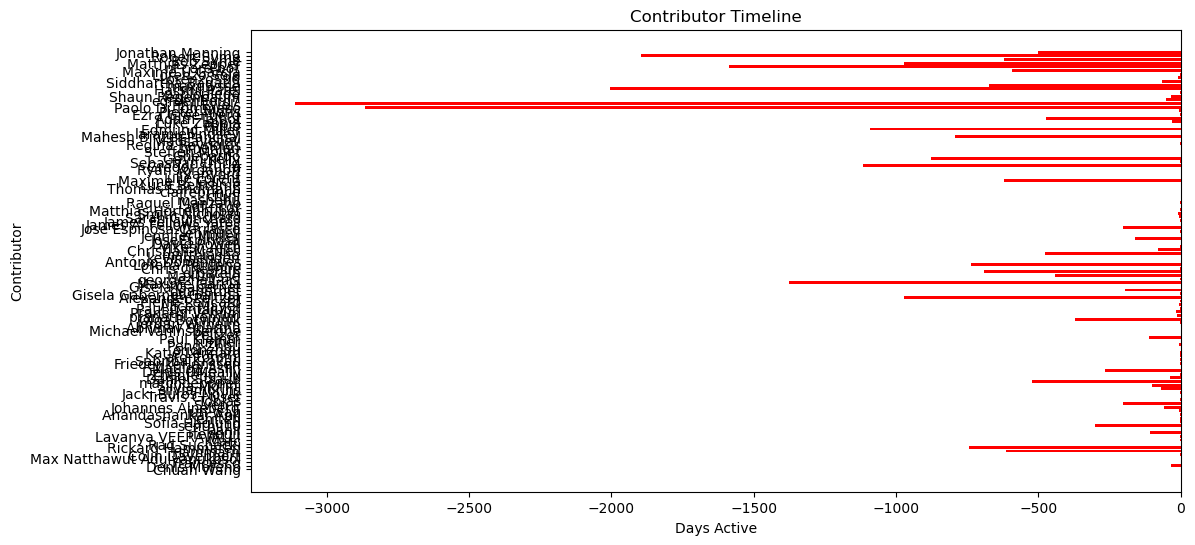

Total Contributors: 115
First Commit Date: 2016-03-01 15:40:50+01:00
Last Commit Date: 2024-12-20 16:49:29+00:00
Top Contributors:
                                   First Commit         Last Commit  \
Chuan Wang                  2016-09-15 13:35:29 2016-09-15 13:35:29   
Denis Moreno                2016-12-09 16:16:29 2016-11-07 16:10:58   
Francesco                   2017-04-19 12:31:27 2017-04-19 12:31:27   
Max Natthawut Adulyanukosol 2017-10-30 15:03:59 2017-10-30 15:03:59   
Colin Davenport             2017-12-14 16:45:55 2017-12-14 16:45:35   
Hammarn                     2018-03-20 08:44:30 2016-07-14 11:39:52   
Rickard Hammarén            2018-03-20 11:46:49 2016-03-07 07:37:30   
Rad Suchecki                2018-04-10 01:32:41 2018-04-10 01:32:41   
Marc                        2018-04-13 14:09:39 2018-04-13 13:34:00   
Lavanya VEERAVALLI          2018-05-30 14:31:21 2018-05-30 07:58:19   

                             Total Commits  
Chuan Wang                               1

In [18]:
# Extract first and last commits
def get_commit_timeline(repo):
    first_commit = list(repo.iter_commits())[-1]
    last_commit = list(repo.iter_commits())[0]
    print(f"First Commit: {first_commit.authored_datetime}, Author: {first_commit.author.name}")
    print(f"Last Commit: {last_commit.authored_datetime}, Author: {last_commit.author.name}")
    return first_commit, last_commit

first_commit, last_commit = get_commit_timeline(repo)

# Extract contributor activity
def get_contributor_activity(repo):
    contributor_data = {}
    for commit in repo.iter_commits():
        author = commit.author.name
        if author not in contributor_data:
            contributor_data[author] = {
                "First Commit": commit.authored_datetime,
                "Last Commit": commit.authored_datetime,
                "Total Commits": 1
            }
        else:
            contributor_data[author]["Last Commit"] = commit.authored_datetime
            contributor_data[author]["Total Commits"] += 1
    df_contributors = pd.DataFrame.from_dict(contributor_data, orient='index')
    df_contributors["First Commit"] = pd.to_datetime(df_contributors["First Commit"], utc=True).dt.tz_convert(None)
    df_contributors["Last Commit"] = pd.to_datetime(df_contributors["Last Commit"], utc=True).dt.tz_convert(None)
    df_contributors.sort_values(by="Total Commits", ascending=False, inplace=True)
    display(df_contributors)
    return df_contributors

df_contributors = get_contributor_activity(repo)

# Plot contributor activity timeline
def plot_contributor_timeline(df_contributors):
    plt.figure(figsize=(12,6))
    df_contributors.sort_values("First Commit", inplace=True)
    plt.barh(df_contributors.index, (df_contributors["Last Commit"] - df_contributors["First Commit"]).dt.days, color='red')
    plt.xlabel("Days Active")
    plt.ylabel("Contributor")
    plt.title("Contributor Timeline")
    plt.show()

plot_contributor_timeline(df_contributors)

# Findings summary
def summarize_findings(df_contributors, first_commit, last_commit):
    print(f"Total Contributors: {len(df_contributors)}")
    print(f"First Commit Date: {first_commit.authored_datetime}")
    print(f"Last Commit Date: {last_commit.authored_datetime}")
    print("Top Contributors:")
    print(df_contributors.head(10))

summarize_findings(df_contributors, first_commit, last_commit)


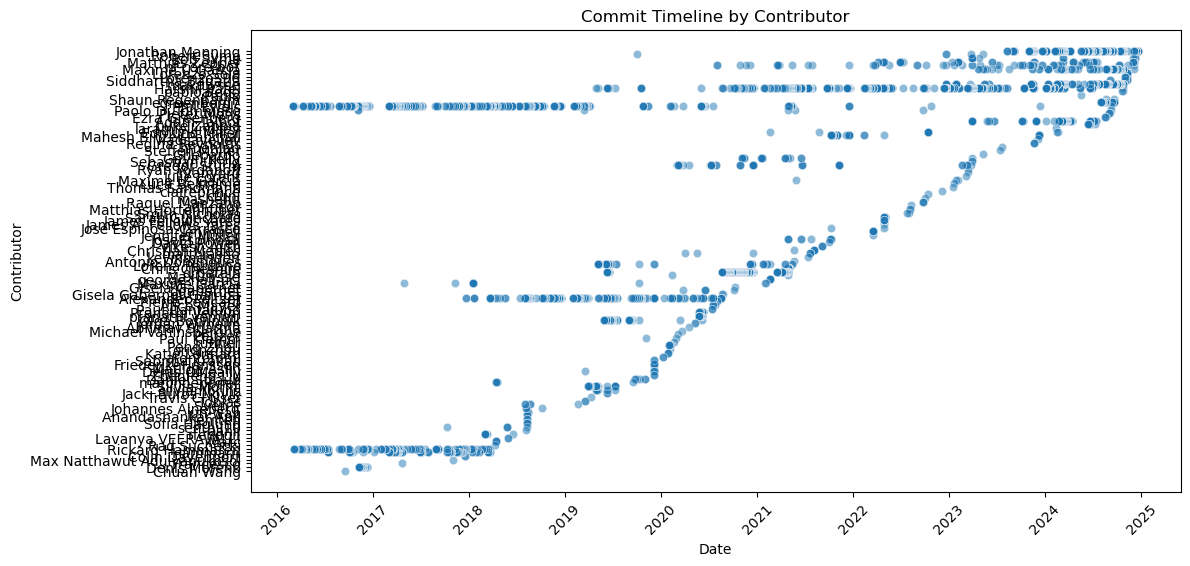

In [19]:
# Plot timeline chart of commits for each contributor
def plot_commit_timeline(repo):
    commit_data = []
    for commit in repo.iter_commits():
        commit_data.append({
            "Author": commit.author.name,
            "Date": commit.authored_datetime
        })
    df_commits = pd.DataFrame(commit_data)
    df_commits["Date"] = pd.to_datetime(df_commits["Date"], utc=True).dt.tz_convert(None)
    
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df_commits, x="Date", y="Author", alpha=0.5)
    plt.xticks(rotation=45)
    plt.title("Commit Timeline by Contributor")
    plt.xlabel("Date")
    plt.ylabel("Contributor")
    plt.show()

plot_commit_timeline(repo)

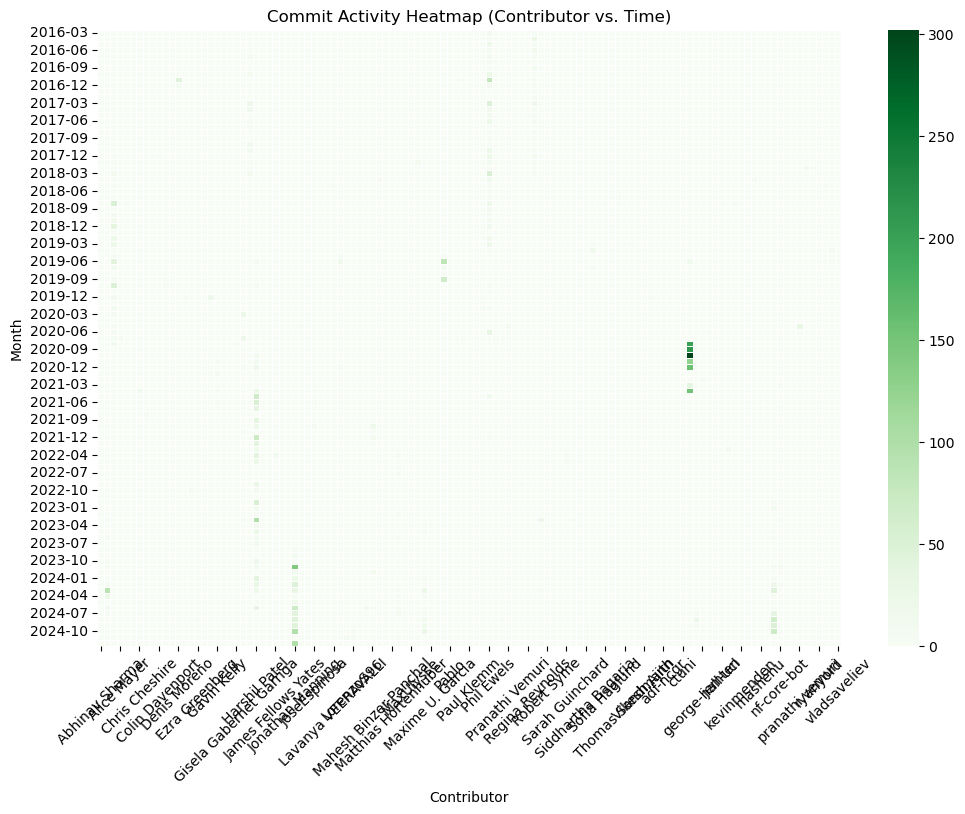

In [20]:
def plot_commit_heatmap(df_commits):
    df_commits["Date"] = pd.to_datetime(df_commits["Date"], errors="coerce", utc=True).dt.tz_convert(None)
    df_commits["Month"] = df_commits["Date"].dt.to_period("M")
    df_heatmap = df_commits.groupby(["Month", "Author"]).size().unstack(fill_value=0)
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_heatmap, cmap="Greens", linewidths=0.5)
    plt.xticks(rotation=45)
    plt.title("Commit Activity Heatmap (Contributor vs. Time)")
    plt.xlabel("Contributor")
    plt.ylabel("Month")
    plt.show()

plot_commit_heatmap(df_commits)